<a href="https://colab.research.google.com/github/tanongsakintean/google_colab/blob/main/Lab_08_6406021622095.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 8: Data Exploration and Visualization (Numeric Data)**
**คำสั่ง**

1.   ศึกษาวิธีการสำรวจลักษณะการกระจายของข้อมูลเชิงตัวเลขด้วยค่าสถิติเชิงพรรณนาและการแสดงภาพข้อมูล
2.   ทำโจทย์ปฏิบัติการแต่ละข้อตามคำสั่ง
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_08_XXXXXXXXXXXXX.ipynb โดย XXXXXXXXXXXXX คือ รหัสนักศึกษา
4. ทำการดาวน์โหลดและส่งไฟล์ Lab_08_XXXXXXXXXXXXX.ipynb ที่ Google Classroom

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import seaborn as sns
from sklearn.cluster import DBSCAN

In [4]:
# load breast cancer data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/csv/breast_cancer_data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Describe the distribution shape using descriptive statistice**

In [5]:
print('Mean of radius_mean =',df['radius_mean'].mean())
print('Median of radius_mean =',df['radius_mean'].median())
print('Mode of radius_mean:',)
mode_radius_mean = df['radius_mean'].mode()
for mode in mode_radius_mean:
  print(mode)
print('SD of radius_mean =',df['radius_mean'].std())
print('Variance of radius_mean =',df['radius_mean'].var())
print('Kurtosis of radius_mean =',df['radius_mean'].kurt())
print('Excess kurtosis of radius_mean =',df['radius_mean'].kurt()-3)
print('Skewness of radius_mean =',df['radius_mean'].skew())
IQR_radius_mean = df['radius_mean'].quantile(0.75)-df['radius_mean'].quantile(0.25)
LL_radius_mean = df['radius_mean'].quantile(0.25)-1.5*IQR_radius_mean
UL_radius_mean = df['radius_mean'].quantile(0.75)+1.5*IQR_radius_mean
print('IQR of radius_mean =',IQR_radius_mean)
print('Lower limit of radius_mean =',LL_radius_mean)
print('Upper limit of radius_mean =',UL_radius_mean)

Mean of radius_mean = 14.127291739894552
Median of radius_mean = 13.37
Mode of radius_mean:
12.34
SD of radius_mean = 3.5240488262120775
Variance of radius_mean = 12.418920129526722
Kurtosis of radius_mean = 0.8455216229065377
Excess kurtosis of radius_mean = -2.1544783770934623
Skewness of radius_mean = 0.9423795716730992
IQR of radius_mean = 4.08
Lower limit of radius_mean = 5.579999999999999
Upper limit of radius_mean = 21.9


ปฏิบัติการข้อ 1) จงอธิบายลักษณะการกระจายของค่าตัวแปร area_mean ด้วยค่าสถิติเชิงพรรณนา

In [9]:
# Answer here!
print('Mean of area_mean =',df['area_mean'].mean())
print('Median of area_mean =',df['area_mean'].median())
print('Mode of area_mean:',)
mode_area_mean = df['area_mean'].mode()
for mode in mode_area_mean:
  print(mode)
print('SD of area_mean =',df['area_mean'].std())
print('Variance of area_mean =',df['area_mean'].var())
print('Kurtosis of area_mean =',df['area_mean'].kurt())
print('Excess kurtosis of area_mean =',df['area_mean'].kurt()-3)
print('Skewness of area_mean =',df['area_mean'].skew())
IQR_area_mean = df['area_mean'].quantile(0.75)-df['area_mean'].quantile(0.25)
LL_area_mean = df['area_mean'].quantile(0.25)-1.5*IQR_area_mean
UL_area_mean = df['area_mean'].quantile(0.75)+1.5*IQR_area_mean
print('IQR of area_mean =',IQR_area_mean)
print('Lower limit of area_mean =',LL_area_mean)
print('Upper limit of area_mean =',UL_area_mean)

Mean of area_mean = 654.8891036906855
Median of area_mean = 551.1
Mode of area_mean:
512.2
SD of area_mean = 351.914129181653
Variance of area_mean = 123843.55431768115
Kurtosis of area_mean = 3.6523027623507582
Excess kurtosis of area_mean = 0.6523027623507582
Skewness of area_mean = 1.6457321756240424
IQR of area_mean = 362.40000000000003
Lower limit of area_mean = -123.30000000000001
Upper limit of area_mean = 1326.3000000000002


ปฏิบัติการข้อ 2) จงเขียนฟังก์ชันเพื่อตรวจหาค่าผิดปรกติของค่าตัวแปรหนึ่งๆ

In [30]:
# Answer here!
def find_outliers_iqr(data, variable):
  Q1 = data[variable].quantile(0.25)
  Q3 = data[variable].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
  return outliers[variable]

ปฏิบัติการข้อ 3) จงเรียกใช้ฟังก์ในข้อ 2 เพื่อตรวจหาค่าของตัวแปร radius_mean ที่อาจเป็นข้อมูลผิดปรกติ

In [31]:
# Answer here!
outliers = find_outliers_iqr(df, 'radius_mean')
print(outliers)

82     25.22
108    22.27
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
369    22.01
461    27.42
503    23.09
521    24.63
Name: radius_mean, dtype: float64


ปฏิบัติการข้อ 4) จงเขียนฟังก์ชันเพื่อระบุลักษณะการกระจายของค่าตัวแปรว่ามีการแจกแจงค่าตัวแปรแบบใด

In [34]:
# Answer here!
def identify_distribution(data, variable):

  skewness = skew(data[variable])
  kurt = kurtosis(data[variable])

  if -0.5 <= skewness <= 0.5 and -2 <= kurt <= 2:
    return "การกระจายมีแนวโน้มเป็นแบบปกติ"
  elif skewness > 0.5 and kurt > 2:
    return "การกระจายมีแนวโน้มเบ้ขวาและ leptokurtic"
  elif skewness < -0.5 and kurt > 2:
    return "การกระจายมีแนวโน้มเบ้ซ้ายและ leptokurtic"
  elif skewness > 0.5 and kurt < -2:
    return "การกระจายมีแนวโน้มเบ้ขวาและ platykurtic"
  elif skewness < -0.5 and kurt < -2:
    return "การกระจายมีแนวโน้มเบ้ซ้ายและ platykurtic"
  else:
    return "ไม่สามารถจำแนกการกระจายได้อย่างง่ายดาย"

ปฏิบัติการข้อ 5) จงเรียกใช้ฟังก์ชันในข้อ 3 เพื่อระบุลักษณะการกระจายของค่าตัวแปร compactness_mean

In [35]:
# Answer here!
distribution_type = identify_distribution(df, 'compactness_mean')
print(distribution_type)

ไม่สามารถจำแนกการกระจายได้อย่างง่ายดาย


**Describe the shape of distribution by data visualizing**

<Axes: xlabel='radius_mean', ylabel='Count'>

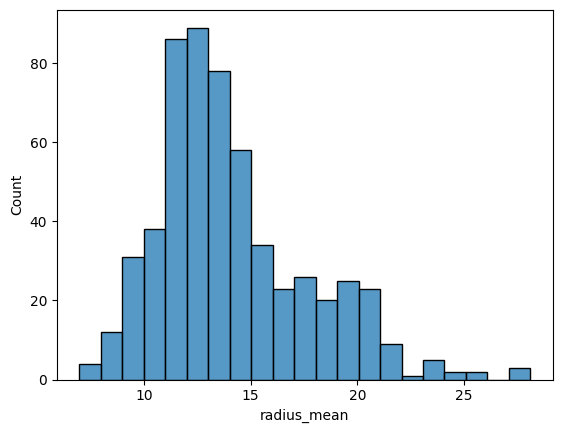

In [10]:
# Histogram
n = df.shape[0]   # number of samples
h = 2*IQR_radius_mean*(n**(-1/3))   # estimate binwidth using Freedman-Diaconis rule

sns.histplot(data=df, x="radius_mean", binwidth=h)

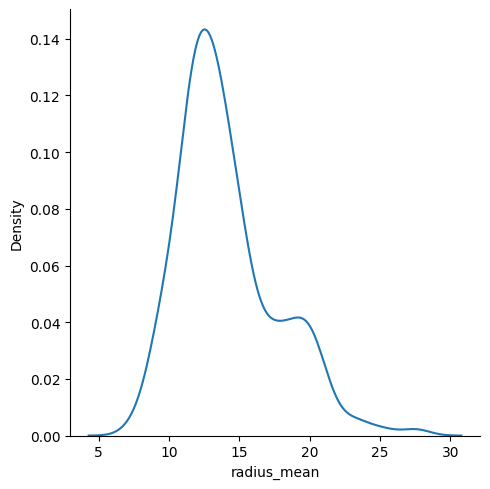

In [11]:
# Density plot
bw = 0.786*IQR_radius_mean*(n**(-1/5))
sns.displot(data=df, x="radius_mean", kind="kde", bw_adjust=bw)

<Axes: xlabel='radius_mean', ylabel='Count'>

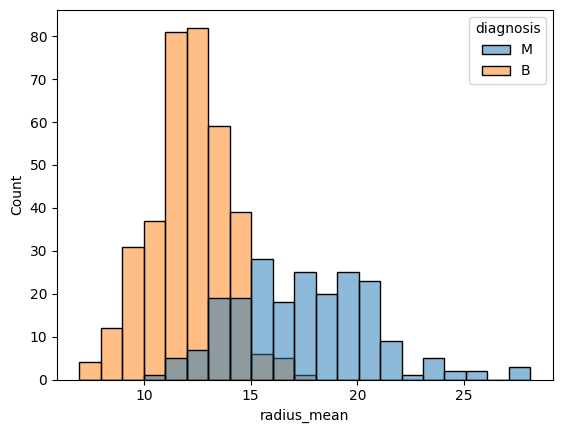

In [12]:
# Histogram with conditioning on other variables
n = df.shape[0]   # number of samples
h = 2*IQR_radius_mean*(n**(-1/3))   # estimate binwidth using Freedman-Diaconis rule

sns.histplot(data=df, x="radius_mean",  hue="diagnosis", binwidth=h)

<Axes: ylabel='radius_mean'>

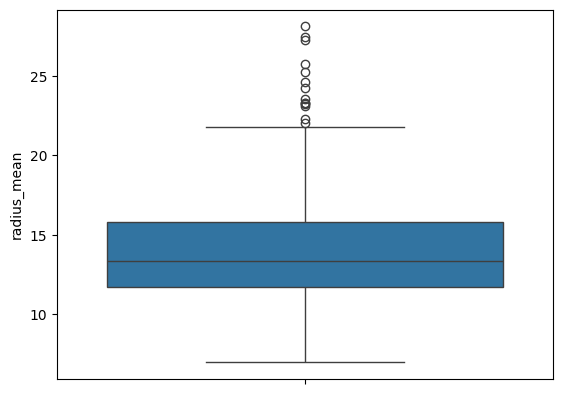

In [13]:
# Boxplot
sns.boxplot(data=df, y="radius_mean")

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

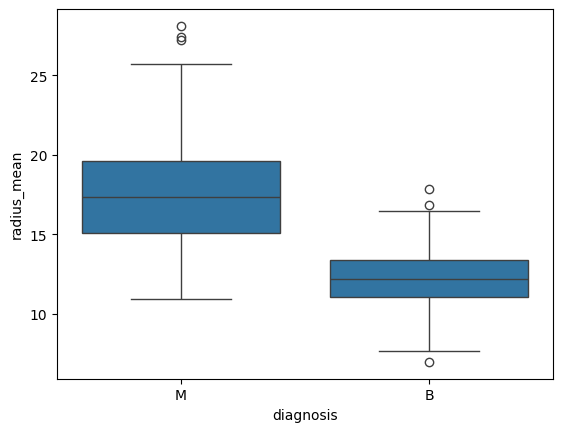

In [14]:
#compare the distributions of a variable for each category
sns.boxplot(data=df, x="diagnosis",y='radius_mean')

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

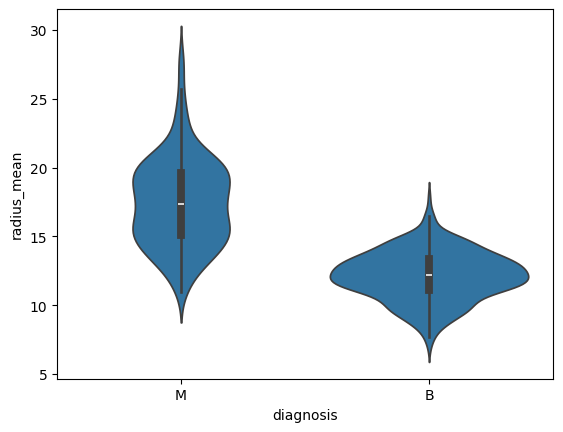

In [15]:
# Violin Plot
sns.violinplot(data=df, x="diagnosis",y='radius_mean')

ปฏิบัติการข้อ 6) จงสร้างภาพนำเสนอการกระจายของค่าข้อมูลตัวแปร area_mean

<Axes: xlabel='area_mean', ylabel='Density'>

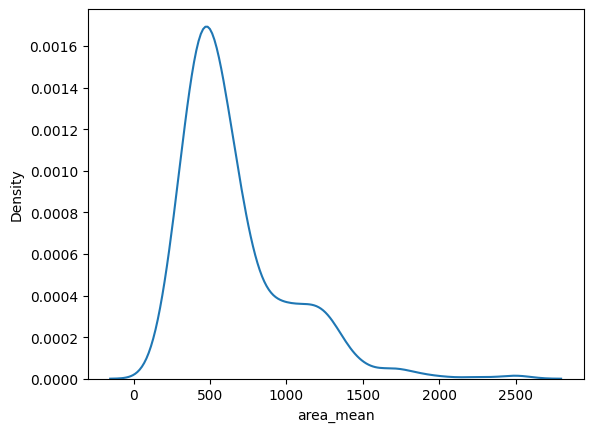

In [36]:
# Answer here!
sns.kdeplot(data=df, x='area_mean')

ปฏิบัติการข้อ 7) การกระจายของค่าตัวแปร area_mean ในผู้ป่วยที่เป็นโรคมะเร็งเต้านม และผู้ป่วยที่ไม่ได้เป็นโรคมะเร็งเต้านม มีความแตกต่างกันหรือไม่

<Axes: xlabel='diagnosis', ylabel='area_mean'>

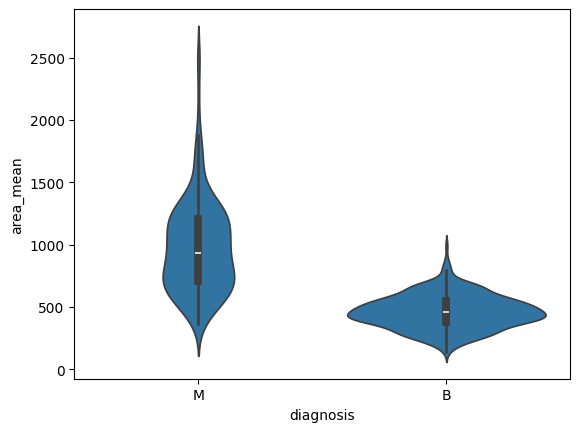

In [42]:
# Answer here!
sns.violinplot(data=df, x='diagnosis', y='area_mean')

ปฏิบัติการข้อ 8) จงเขียนฟังก์ชันแสดงค่าผิดปรกติของค่าตัวแปรหนึ่ง (var1) ในแต่ละกลุ่มข้อมูลที่แบ่งแยกด้วยค่าแปรเชิงกลุ่มอีกตัวแปรหนึ่ง (var2)

In [45]:
def display_outliers(data, var1, var2):

  for group in data[var2].unique():
    group_data = data[data[var2] == group]
    Q1 = group_data[var1].quantile(0.25)
    Q3 = group_data[var1].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group_data[(group_data[var1] < lower_bound) | (group_data[var1] > upper_bound)]

    if not outliers.empty:
      print(f"Outliers in {var1} for group {var2} = {group}:")
      print(outliers)

display_outliers(df, 'compactness_mean', 'diagnosis')

Outliers in compactness_mean for group diagnosis = M:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
3    84348301         M        11.42         20.38           77.58      386.1   
78    8610862         M        20.18         23.97          143.70     1245.0   
108     86355         M        22.27         19.67          152.80     1509.0   
122    865423         M        24.25         20.20          166.20     1761.0   
181    873593         M        21.09         26.57          142.70     1311.0   
258    887181         M        15.66         23.20          110.20      773.5   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.1184            0.2776          0.3001               0.1471   
3             0.1425            0.2839          0.2414    

ปฏิบัติการข้อ 9) จงปรับปรุงฟังก์ชันในข้อ 8 ให้สามารถส่งข้อมูล (index ของข้อมูล) ที่มีค่าผิดปรกติกลับเป็นข้อมูลออก

In [50]:
def detect_display_outliers(data, var1, var2):
  outliers = []
  for group in data[var2].unique():
    group_data = data[data[var2] == group]
    Q1 = group_data[var1].quantile(0.25)
    Q3 = group_data[var1].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group_outliers = group_data[(group_data[var1] < lower_bound) | (group_data[var1] > upper_bound)]

    if not group_outliers.empty:
      print(f"Outliers in {var1} for group {var2} = {group}:")
      print(group_outliers)
      outliers.extend(group_outliers.index.tolist())
      return outliers

ปฏิบัติการข้อ 10) จงเรียกใช้ฟังก์ชันในข้อ 9 เพื่อตรวจหาค่าของตัวแปร compactness_mean ที่อาจเป็นข้อมูลผิดปรกติในแต่ละกลุ่มตามค่าตัวแปร diagnosis

In [51]:
# Answer here!
outlier_indices = detect_display_outliers(df, 'compactness_mean', 'diagnosis')
print(f"\nOutlier indices: {outlier_indices}")

Outliers in compactness_mean for group diagnosis = M:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
3    84348301         M        11.42         20.38           77.58      386.1   
78    8610862         M        20.18         23.97          143.70     1245.0   
108     86355         M        22.27         19.67          152.80     1509.0   
122    865423         M        24.25         20.20          166.20     1761.0   
181    873593         M        21.09         26.57          142.70     1311.0   
258    887181         M        15.66         23.20          110.20      773.5   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.1184            0.2776          0.3001               0.1471   
3             0.1425            0.2839          0.2414    